In [40]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from glob import glob
from PIL import Image
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [41]:
wavelengths = [647, 561, 488]  # nm
NA = 1.25

In [42]:
def get_mu_sigma(filename: str) -> tuple[float, float]:
    with open(filename, 'r') as f:
        contents = f.readlines()
    
    mu = float(contents[-2].split(' = ')[-1][:-1])
    sigma = float(contents[-1].split(' = ')[-1][:-1])
    return mu, sigma

In [43]:
for i, wavelen in enumerate(wavelengths):
    mus = np.zeros(10)
    sigmas = np.zeros(10)
    for j, log in enumerate(glob(f'../data/Acquisition-{i+1}/analysis/Log*.txt')):
        mu, sigma = get_mu_sigma(log)
        mus[j] = mu
        sigmas[j] = sigma
    print(np.mean(mus), np.mean(sigmas), 0.21 * wavelen / NA)


5.095724 1.95372 108.696
3.6692 1.566916 94.248
4.0801289999999995 1.583306 81.984


In [28]:
im = Image.open('../data/Acquisition-1/image_Nano-2D(15nmPix).tif')
imarray = np.array(im)
imarray, im.size

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (3369, 3369))

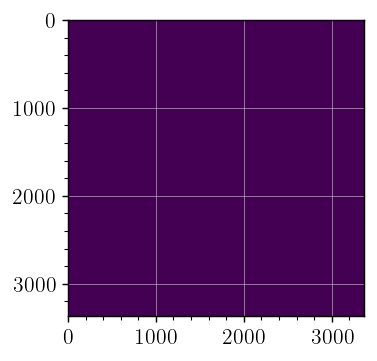

In [44]:
a = plt.imread('../data/Acquisition-1/image_Nano-2D(15nmPix).tif')
plt.imshow(a[..., 0])